In [19]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [2]:
df1 = pd.read_csv ("retail_price.csv")
print(df1.head())

  product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1      comp_2  ps2  \
0                   2  ...    89.

In [3]:
print(df1.isnull().sum())

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64


In [4]:
print(df1.describe())

              qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000                  339.000

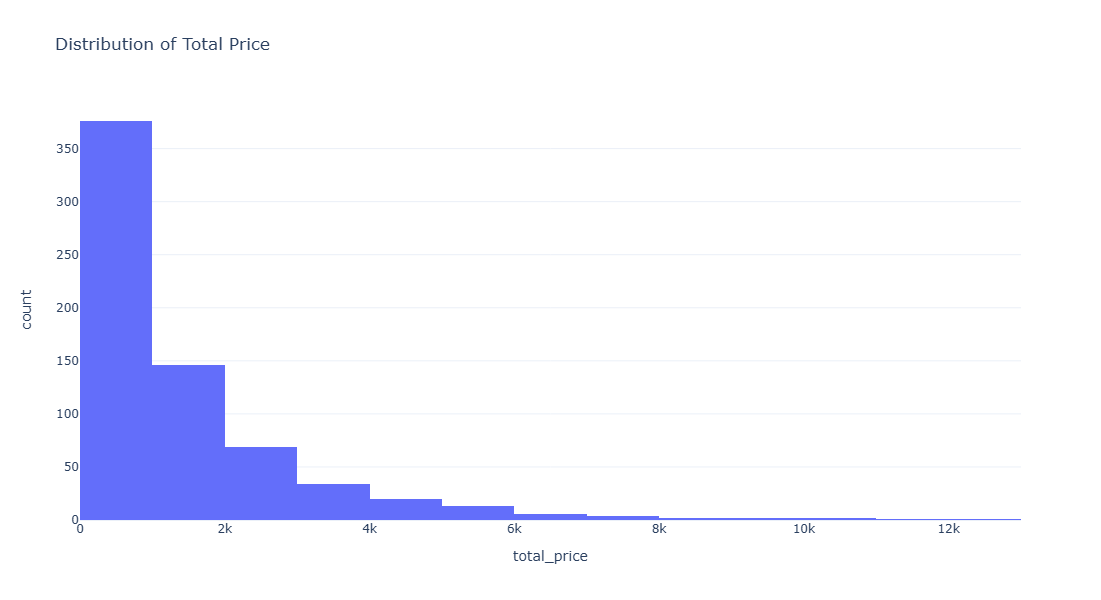

In [71]:
fig = px.histogram(df1, 
                   x='total_price', 
                   nbins=20, 
                   title='Distribution of Total Price')
fig.update_layout(
    width=900,  # Set the width of the plot
    height=600  # Set the height of the plot to match the width
)
fig.show()

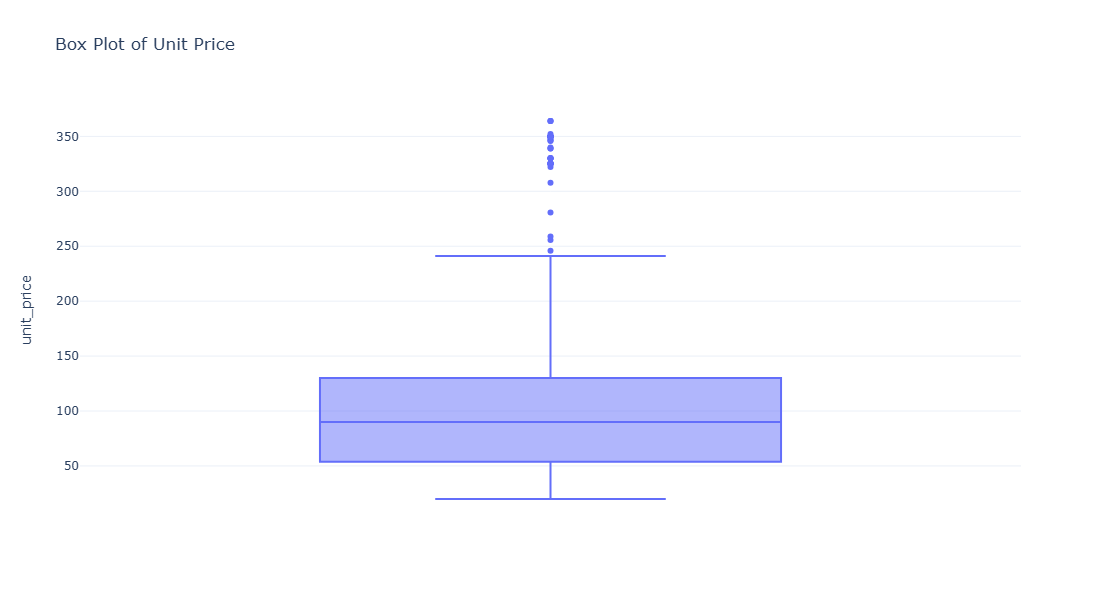

In [69]:
fig = px.box(df1, 
             y='unit_price', 
             title='Box Plot of Unit Price')
fig.update_layout(
    width=600,  # Set the width of the plot
    height=600  # Set the height of the plot to match the width
)
fig.show()

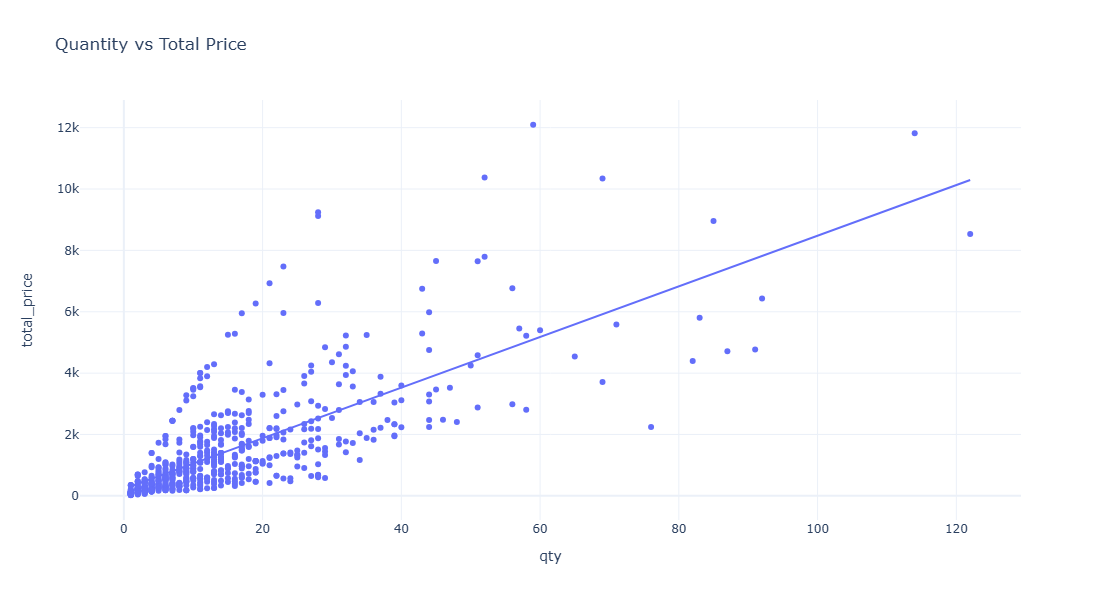

In [63]:
fig = px.scatter(df1, 
                 x='qty', 
                 y='total_price', 
                 title='Quantity vs Total Price', trendline="ols")
fig.update_layout(
    width=900,  # Set the width of the plot
    height=600  # Set the height of the plot to match the width
)
fig.show()

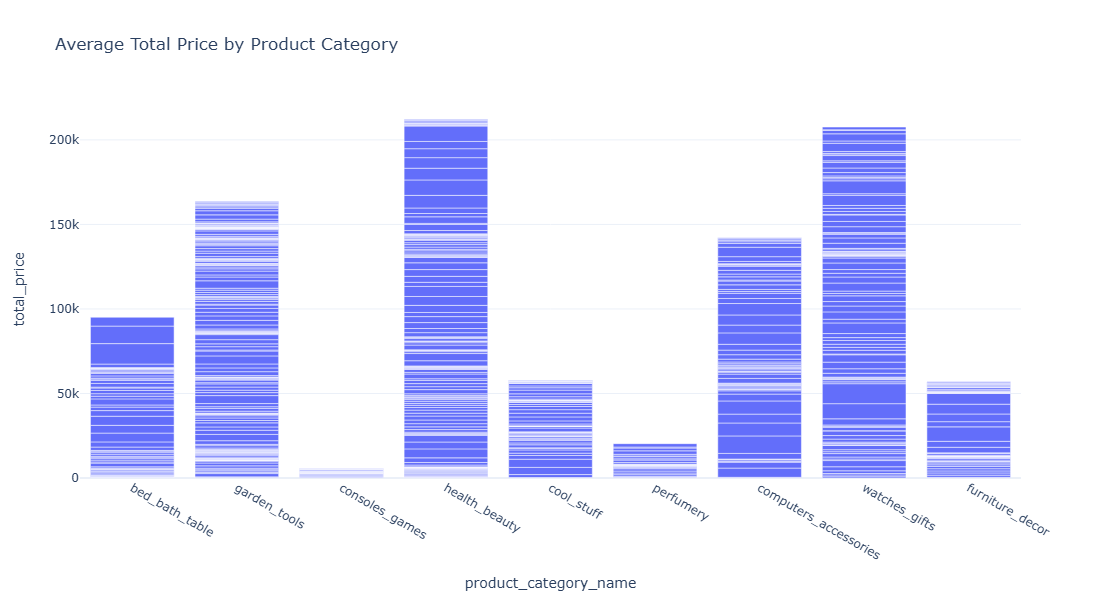

In [61]:
fig = px.bar(df1, x='product_category_name', 
             y='total_price', 
             title='Average Total Price by Product Category')

fig.update_layout(
    width=900,  # Set the width of the plot
    height=600  # Set the height of the plot to match the width
)
fig.show()

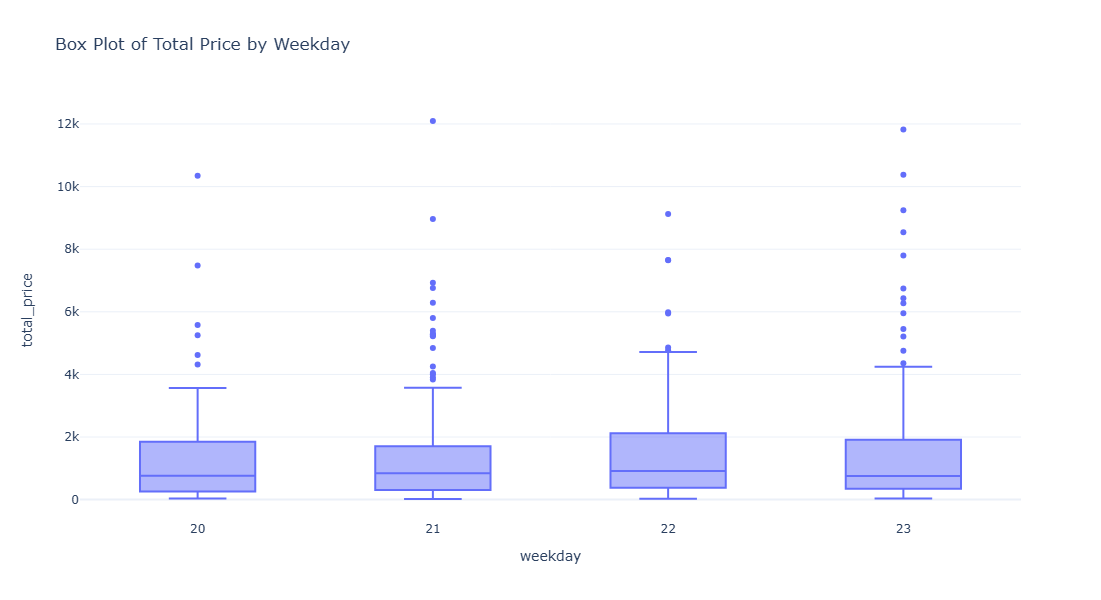

In [59]:
fig = px.box(df1, x='weekday', 
             y='total_price', 
             title='Box Plot of Total Price by Weekday')
fig.update_layout(
    width=900,  # Set the width of the plot
    height=600  # Set the height of the plot to match the width
)
fig.show()

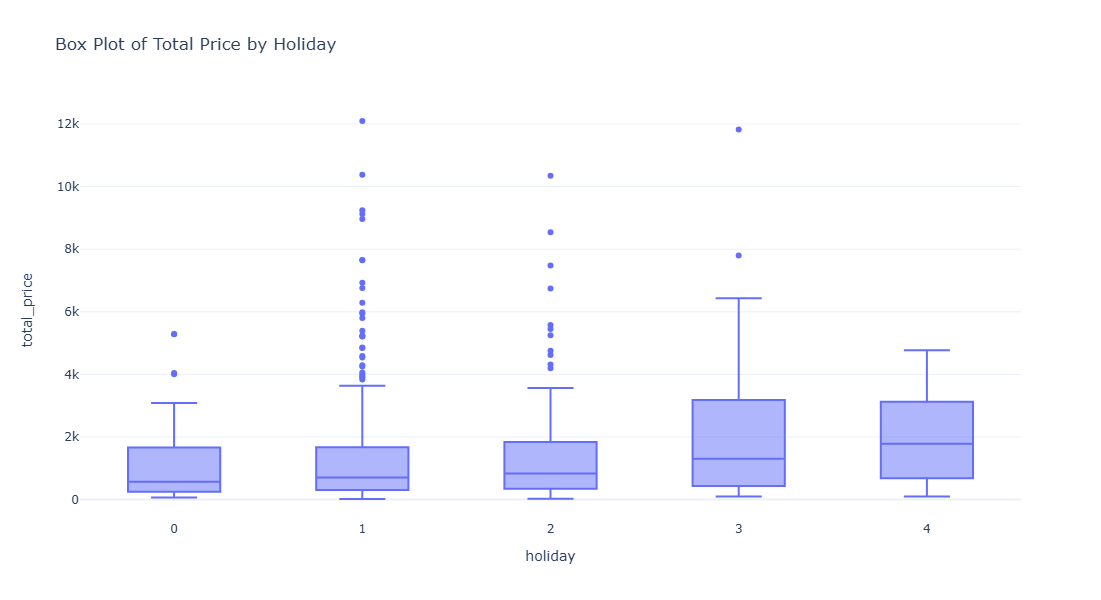

In [55]:
fig = px.box(df1, x='holiday', 
             y='total_price', 
             title='Box Plot of Total Price by Holiday')
fig.update_layout(
    width=900,  # Set the width of the plot
    height=600  # Set the height of the plot to match the width
)

fig.show()

In [23]:
# Select only numeric columns
df1_numeric = df1.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = df1_numeric.corr()

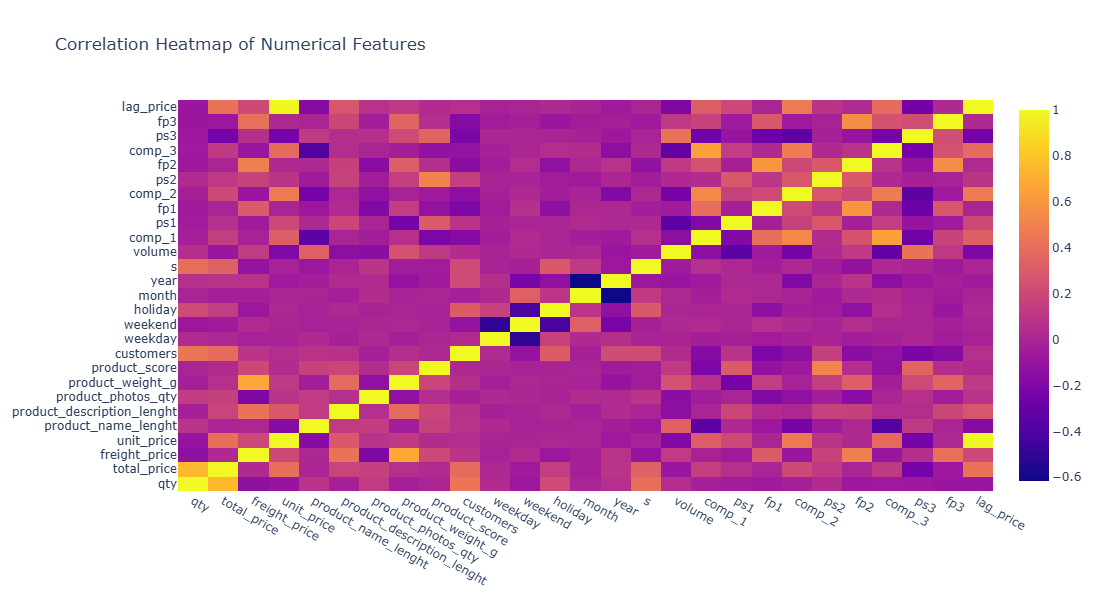

In [51]:
fig = go.Figure(go.Heatmap(x=correlation_matrix.columns, 
                           y=correlation_matrix.columns, 
                           z=correlation_matrix.values))
fig.update_layout(
    title='Correlation Heatmap of Numerical Features',
    width=800,  # Set the width of the plot
    height=600  # Set the height of the plot to match the width
)
fig.show()

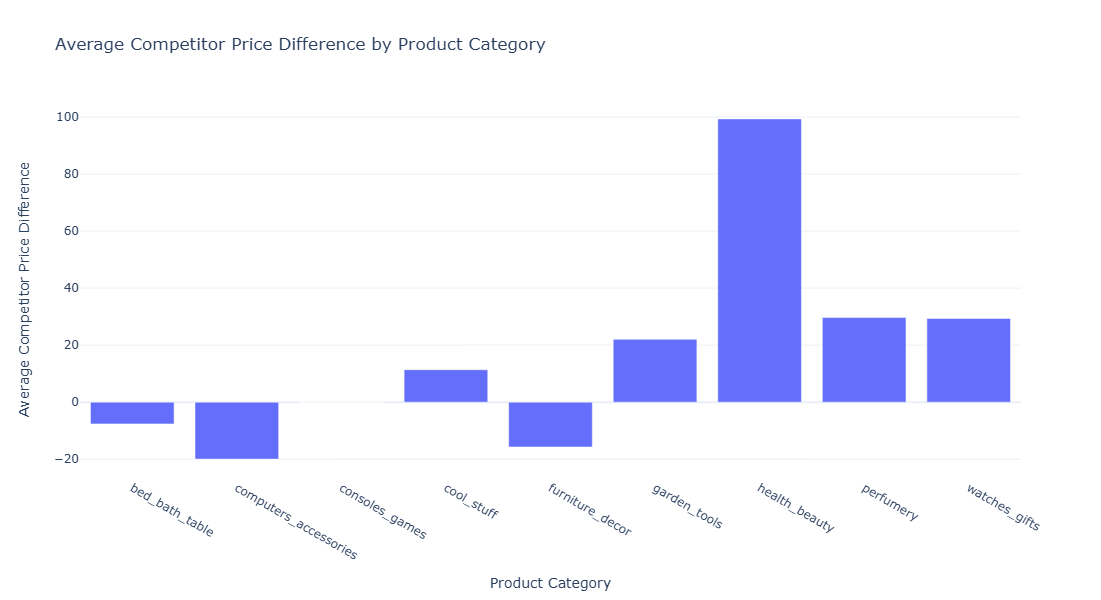

In [45]:
df1['comp_price_diff'] = df1['unit_price'] - df1['comp_1'] 

avg_price_diff_by_category = df1.groupby('product_category_name')['comp_price_diff'].mean().reset_index()

fig = px.bar(avg_price_diff_by_category, 
             x='product_category_name', 
             y='comp_price_diff', 
             title='Average Competitor Price Difference by Product Category')
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Average Competitor Price Difference',
    width=900,  # Set the width of the plot
    height=600  # Set the height of the plot to match the width
)
fig.show()

## Retail Price Optimization Model 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [33]:
X = df1[['qty', 'unit_price', 'comp_1', 
          'product_score', 'comp_price_diff']]
y = df1['total_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

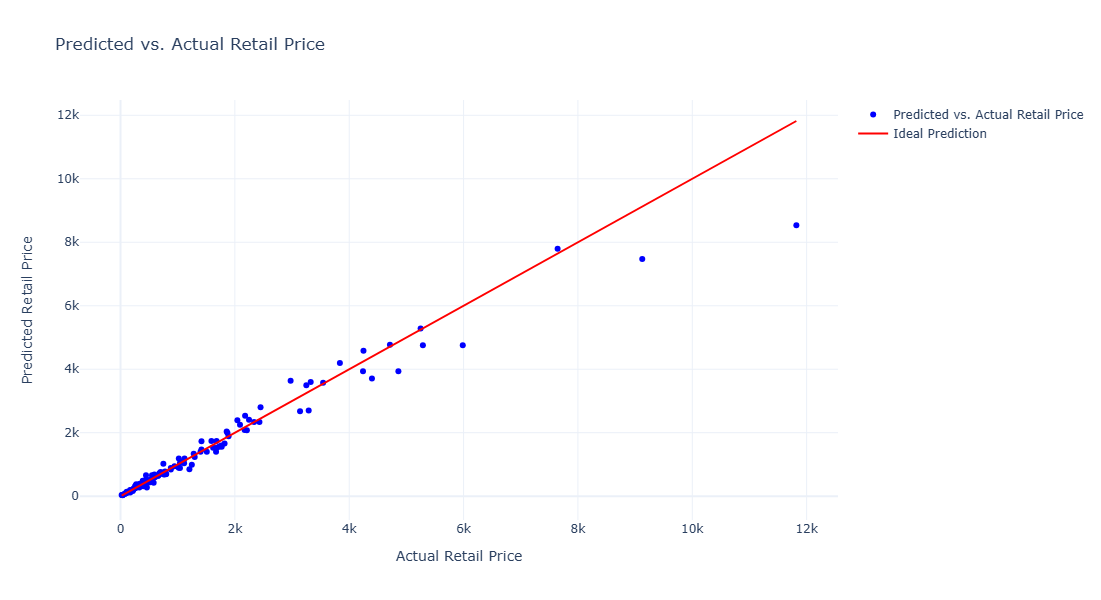

In [41]:
y_pred = model.predict(X_test)

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', 
                         marker=dict(color='blue'), 
                         name='Predicted vs. Actual Retail Price'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], 
                         mode='lines', 
                         marker=dict(color='red'), 
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price',
    width=1000,  # Set the width of the plot
    height=600  # Set the height of the plot to match the width
)
fig.show()